In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc 
sns.set(style = "whitegrid")
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import datetime

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# from sklearn.neural_network import MLPRegressor

import os
import	hashlib
from	sklearn.model_selection	import	train_test_split
from	sklearn.model_selection	import	StratifiedShuffleSplit
from	pandas.tools.plotting	import	scatter_matrix
from	sklearn.preprocessing	import	LabelEncoder 
from	sklearn.preprocessing	import	OneHotEncoder
from	sklearn.preprocessing	import	LabelBinarizer
from	sklearn.pipeline	import	FeatureUnion

In [4]:
train_set=pd.read_csv('agg_match_stats_0.csv', header=0, sep=',', quotechar='"')# read csv into df
train_set.dropna(inplace=True)
print(len(train_set))
train_set.head()

13829038


,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,1,2870.72400,1784.847780,117,1,SnuffIes,1106.320,4,18
1,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,1,2938.40723,1756.079710,127,1,Ozon3r,1106.315,4,18
2,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,0.00000,224.157562,67,0,bovize,235.558,5,33
3,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,0.00000,92.935150,0,0,sbahn87,197.553,5,33
4,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,2619.07739,2510.447000,175,2,GeminiZZZ,1537.495,14,11


In [ ]:
# filtered_df = train[(train['matchDuration'] >= 2000)]
#print(sum(train_set['player_survive_time'])/(len(train_set)))

In [6]:
def	split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train, test = split_train_test(train_set, 0.2) 

In [8]:
print(len(train),"train +",len(test), "test") 

11063231 train + 2765807 test


In [9]:
# train_set.dropna(inplace=True)
print(len(train_set))
train_set.head()

13829038


,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,1,2870.72400,1784.847780,117,1,SnuffIes,1106.320,4,18
1,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,1,2938.40723,1756.079710,127,1,Ozon3r,1106.315,4,18
2,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,0.00000,224.157562,67,0,bovize,235.558,5,33
3,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,0.00000,92.935150,0,0,sbahn87,197.553,5,33
4,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,2619.07739,2510.447000,175,2,GeminiZZZ,1537.495,14,11


NameError: name 'files' is not defined

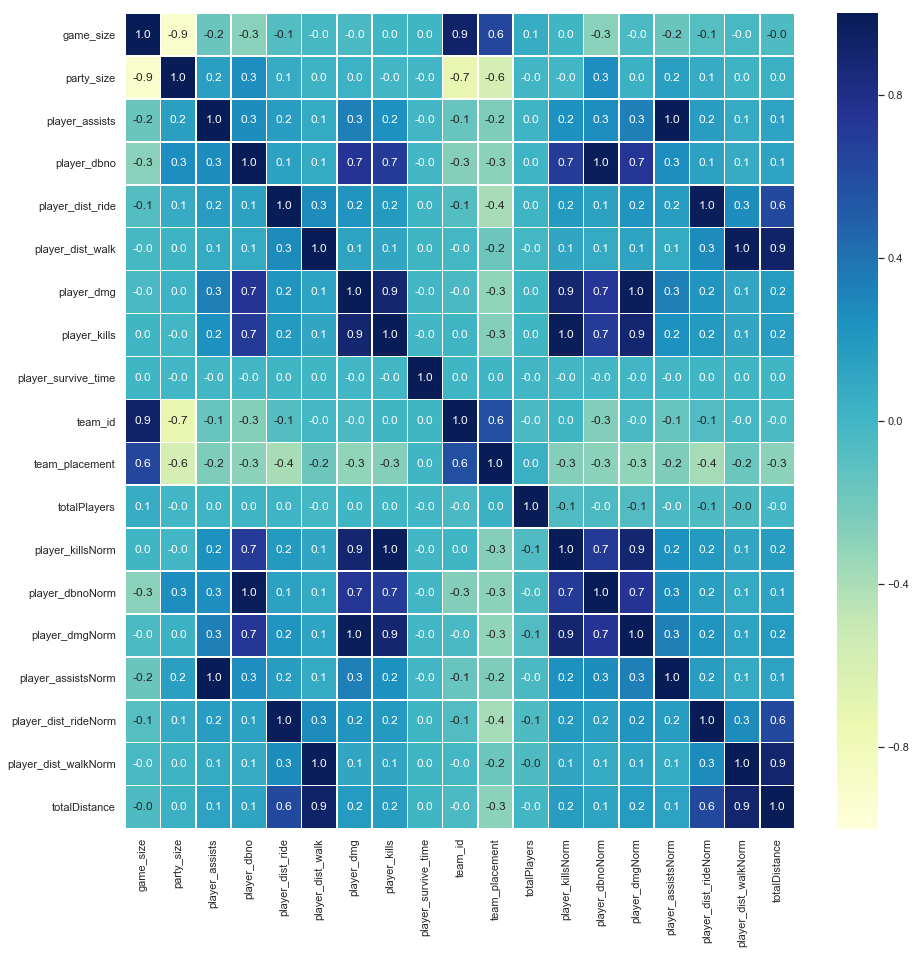

In [37]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.iloc[:,:-2].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu", vmin=-1, vmax =1)
plt.savefig('Corelation_all.png',format='png', dpi = 1500)
files.download('Corelation_all.png')
plt.show()  

In [38]:
train['match_id'].value_counts()

2U4GBNA0YmkEPLpBtAZDJYNXrmTBn_45eCHyyy9xS3hTFYbw7T_7ThDCONeoQg-e    93
2U4GBNA0Ymn4ojoWLfjY1IqOCM-_vkcp7-xm3LhXru7o7jT_pdWBj4lAPSgAy7GK    93
2U4GBNA0YmmjLGtYAths_ez1wmwFictJ4iIZkiyHPPzRvPKSsqK_KZ55zePDVuFF    92
2U4GBNA0YmngMjPRz_lcxvucXDlstxffyb4dDSi2aYqIpwIJ-tuoCiSbN3mROucx    92
2U4GBNA0YmnA8vDgLfi1mRuul0OvECLRHRtLe9WKCX0hd7gHrTdyWG5o2qcHAG7W    92
2U4GBNA0Yml8HVmGFCZfF8Kv_6Qf6JFth7XzKz6My7YYvFz4wJIStG3Zlohnk9wz    92
2U4GBNA0Yml6QO-f6XqTIk2aZlco8c_8ldBecoNRB2lyjuQx8MevE9eqfWAAcjih    92
2U4GBNA0YmnqcviF9o0mX8JoD6oIHhmXerkjQ_vRa2bisI-1yZt1TLyjaP0rjRMF    91
2U4GBNA0Yml-Yb1eJpLkn2BMieHqMgzmWuPOt5n2e-VM86LiX2WXA0Tz7JcuCdaq    91
2U4GBNA0YmldVHrIaUnJCdIw2g-1lPBMyEV7xY29xitakoxdkUJysrASOa1aFqu7    91
2U4GBNA0Ymm0A-UkWCZD4koLcD5yWdV9SELBGMh4f3QsGlQ9iwhy7wPlaWSR0RMY    91
2U4GBNA0YmlbV72ax-1AdnXOYfqyO65cF4hFD-ujA42wwLag8mwlWsw__mkgkjSb    91
2U4GBNA0Ymk7hDR_-76uXgiT-N4Ay6DDNOyGOaqWbwXkswChSks4THfNxWkKHZ4e    91
2U4GBNA0Ymm87Re3KpgfCFZ7AQnU81wH858C2vO80lHlvr3yLq1xlURbX7CkDIug    91
2U4GBN

In [39]:
#Mean of all matches
#train_set.groupby('match_id').mean()
train.groupby('match_id').mean()

,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_id,...,totalPlayers,player_killsNorm,player_dbnoNorm,player_dmgNorm,player_assistsNorm,player_dist_rideNorm,player_dist_walkNorm,totalDistance,killsPerDistance,damageDealtPerDistance
match_id,,,,,,,,,,,,,,,,,,,,,
2U4GBNA0Ymk--3atnvB2Cy2-kmfWLqeLwaiFMfmzWQFhCkWmYZiq4XKDsLngboSq,46.0,2.0,0.174603,0.650794,587.007027,1515.333312,132.587302,0.904762,926.740238,25.269841,...,64.0,1.413690,1.016865,207.167659,0.272817,917.198480,2367.708300,2102.340339,0.000849,0.195065
2U4GBNA0Ymk--3eiHoaWZvPpeDFMZNYSMM6AOtbUTMCM85nnoNrjNVLzIPDXtHsh,26.0,4.0,0.342857,0.828571,1233.214120,1087.164468,116.342857,0.814286,727.642557,14.914286,...,71.0,1.146881,1.167002,163.863179,0.482897,1736.921296,1531.217561,2320.378588,0.001750,1.417441
2U4GBNA0Ymk--IzbW-ihltP44UHbUvm7oAku86yTg7UOs4oWhJhsnTMzjwRkf72n,28.0,4.0,0.295775,0.718310,1783.929492,1345.140461,102.830986,0.774648,770.665718,14.422535,...,72.0,1.075900,0.997653,142.820814,0.410798,2477.679849,1868.250641,3129.069953,0.001145,0.272129
2U4GBNA0Ymk--PAk8t__rqR-oDLydRupnp5GqJw1hAtJXjRSLezn83J-SJmZi9xi,49.0,2.0,0.220930,0.616279,1155.529408,1025.362313,136.093023,1.000000,711.055942,26.453488,...,87.0,1.149425,0.708367,156.428762,0.253943,1328.194722,1178.577371,2180.891721,0.000932,0.186410
2U4GBNA0Ymk--T_nJd-_GdIbDFJPlAQ0NSi5jUveIsAmqgEoDfHCilkmdKJmfab4,50.0,2.0,0.197368,0.539474,894.436416,828.470495,112.605263,0.921053,641.090855,26.921053,...,77.0,1.196172,0.700615,146.240602,0.256323,1161.605735,1075.935707,1722.906911,0.005560,0.969270
2U4GBNA0Ymk--XAlB-1rZJBM-4Y5-OmLBwhJ7PLkdMrfWuRdYccXFOe0-fZXvQDN,50.0,2.0,0.282353,0.623529,1203.018661,1209.501058,127.176471,0.929412,838.641447,25.729412,...,86.0,1.080711,0.725034,147.879617,0.328317,1398.858908,1406.396579,2412.519719,0.000932,0.369866
2U4GBNA0Ymk--ieVXQ6v0_Ko14N2At1dOhgVfxo2LyULW8V3TKwxDhPbTKghZXs5,50.0,2.0,0.205128,0.576923,888.362966,1133.521999,112.474359,0.871795,711.829667,24.679487,...,79.0,1.103538,0.730282,142.372606,0.259656,1124.510083,1434.837974,2021.884965,0.002621,0.456435
2U4GBNA0Ymk--l3p6h6ejU-0mM2gjlWWUD5ho50LsLnCS712ohhBzp3louFeZDGk,47.0,2.0,0.346154,0.615385,711.891306,1656.354913,128.679487,1.000000,862.761372,24.987179,...,79.0,1.265823,0.778968,162.885427,0.438169,901.128236,2096.651789,2368.246220,0.002313,0.339408
2U4GBNA0Ymk--vuof9i0Ta7bIpAH3Z20XGV-XqYMsHve_dPJR5pyB6zjQ68Bl1bc,49.0,2.0,0.310345,0.574713,1351.808207,1175.117404,126.114943,0.908046,835.352299,25.620690,...,88.0,1.031870,0.653083,143.312435,0.352665,1536.145690,1335.360687,2526.925612,0.002502,0.360662


In [36]:
# pca = PCA()
# X['match_mode'],_ = pd.factorize(X['match_mode'])

In [42]:
# pca.fit(X)

In [50]:
def group_features(data):
  #Find the total players in the match that record is in by groupby on matchId and then counting the rows
  data['totalPlayers'] = data.groupby('match_id')['match_id'].transform('count')+1
  #Same thing for calculating the teamSize of the person in the record by groupby on groupId
#   data['teamSize'] = data.groupby('groupId')['groupId'].transform('count')

  #colsToNormalize = ['DBNOs','assists','boosts','damageDealt','headshotKills','heals','killStreaks','revives','roadKills','vehicleDestroys','weaponsAcquired','winPoints','killPlace','kills','killPoints','winPlace']


  #Create a normalized version of kills->killsNorm and damageDealtNorm to normalize the data for a match of 100 players. Since not all matches have exactly 100 players, we can't compare the
  #data from a match of 50 players to a match of 100 players.
  colsToNormalize = ['player_kills','player_dbno','player_dmg','player_assists','player_dist_ride','player_dist_walk']

  for x in colsToNormalize:
    data[str(x+'Norm')] = data[x]/data['totalPlayers']*100


In [51]:
group_features(train)
group_features(test)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [52]:
def feature_engineering(data):
  #Sum over the total distance travelled by the player including swim, ride and walk
  data['totalDistance'] = data.player_dist_ride+data.player_dist_walk
  data.totalDistance.fillna(0,inplace=True)
  data.totalDistance.replace(np.inf, 0, inplace=True)
    
  data['killsPerDistance'] = data.player_killsNorm/data.totalDistance
  data.killsPerDistance.fillna(0,inplace=True)
  data.killsPerDistance.replace(np.inf, 0, inplace=True)  
    
    

#Normalize the damage dealt by the distance travelled to equate different sizes of matches
  data['damageDealtPerDistance'] = data.player_dmgNorm / data.totalDistance
  data.damageDealtPerDistance.fillna(0,inplace=True)
  data.damageDealtPerDistance.replace(np.inf, 0, inplace=True)
    
feature_engineering(train)
feature_engineering(test)    

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
E:\Anaconda\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._updat

In [54]:
train.head()

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,...,totalPlayers,player_killsNorm,player_dbnoNorm,player_dmgNorm,player_assistsNorm,player_dist_rideNorm,player_dist_walkNorm,totalDistance,killsPerDistance,damageDealtPerDistance
6362827,2017-11-12T06:42:39+0000,27,2U4GBNA0YmnbMObuftAg4p9qrzOtDr7HalmrBE0_lPTLhq...,tpp,4,0,2,0.00000,155.531357,155,...,52,0.000000,3.846154,298.076923,0.0,0.000000,299.098763,155.531357,0.000000,1.916507
2033252,2017-12-27T06:57:59+0000,25,2U4GBNA0Yml1AkhSe0qQgFIRZKVLotC1GTG-pJupCKacWv...,tpp,4,0,0,0.00000,1434.085000,144,...,75,0.000000,0.000000,192.000000,0.0,0.000000,1912.113333,1434.085000,0.000000,0.133883
6171656,2017-11-23T04:53:15+0000,49,2U4GBNA0YmkMO9tIv39HbfYTYE_exiCsorcHcmSAJJZdHs...,tpp,2,0,0,1585.43213,494.151200,43,...,79,1.265823,0.000000,54.430380,0.0,2006.876114,625.507848,2079.583330,0.000609,0.026174
5411136,2017-11-06T23:36:19+0000,97,2U4GBNA0Ymk8aMIuH5ndzlmOdMrbZ2wO-C7-1T36_dVlbU...,tpp,1,0,0,0.00000,17.295214,0,...,67,0.000000,0.000000,0.000000,0.0,0.000000,25.813752,17.295214,0.000000,0.000000
10512006,2018-01-06T14:38:35+0000,27,2U4GBNA0Ymljdpty_KmWMW-wZKsgpbAVDkKOb_girJxXbW...,tpp,4,0,0,0.00000,232.296265,0,...,68,0.000000,0.000000,0.000000,0.0,0.000000,341.612154,232.296265,0.000000,0.000000


In [61]:
flag = True

In [66]:
corr = train.iloc[:,:1].corr()
for x in range(len(corr)):
  corr[x] = abs(corr[x])+1


wordcloud = WordCloud(width=8000, height=4000,background_color="white")
wordcloud.generate_from_frequencies(frequencies=corr)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud1.png",format='png',dpi=1000)
plt.show()

NameError: name 'WordCloud' is not defined